<a href="https://colab.research.google.com/github/hpan270/MSA/blob/master/Train_Scratch_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Train the ResNet50  from scratch on CIFAR10 Images
- All layer2 in ResNet50 is trainable
- UpSampling2D() for input
- BatchNormalization() in full connected layers  
#### After 5 epoch, the train_acc=0.8745, val_acc=0.9328, test_acc (score)=0.933
- refer to https://medium.com/@andrew.dabydeen/transfer-learning-using-resnet50-and-cifar-10-6242ed4b4245
- refer to https://github.com/frlim/data2040_final/blob/master/project_2/CNN_Final.ipynb


In [1]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import tensorflow.keras as keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import tensorflow as tf
from keras.utils import np_utils
from keras.models import load_model
from keras.datasets import cifar10
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

Using TensorFlow backend.


In [2]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(200, 200, 3))


/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [3]:
(X, Y), (x_test, y_test) = cifar10.load_data()

X = X / 255.0
x_test = x_test / 255.0

Y = np_utils.to_categorical(Y, 10)
y_test = np_utils.to_categorical(y_test, 10)

from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.2, random_state=100)

print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
print(conv_base.trainable)
lyt=[ly.trainable for ly in conv_base.layers]
(np.array(lyt)==True).all()

True


True

In [5]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(x_train, y_train, epochs=5, batch_size=20, validation_data=(x_validation, y_validation))

W0815 23:41:04.116123 140487879018368 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 1524s 38ms/sample - loss: 1.7121 - acc: 0.4302 - val_loss: 0.7679 - val_acc: 0.7863
Epoch 2/5
40000/40000 [==============================] - 1515s 38ms/sample - loss: 1.0854 - acc: 0.6724 - val_loss: 0.4819 - val_acc: 0.8827
Epoch 3/5
40000/40000 [==============================] - 1517s 38ms/sample - loss: 0.8181 - acc: 0.7750 - val_loss: 0.3700 - val_acc: 0.9088
Epoch 4/5
40000/40000 [==============================] - 1520s 38ms/sample - loss: 0.6563 - acc: 0.8355 - val_loss: 0.2892 - val_acc: 0.9248
Epoch 5/5
40000/40000 [==============================] - 1519s 38ms/sample - loss: 0.5309 - acc: 0.8745 - val_loss: 0.2535 - val_acc: 0.9328


In [6]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 94s 9ms/sample - loss: 0.2560 - acc: 0.9330
Test loss: 0.2559724878549576
Test accuracy: 0.933


In [0]:
history.history.keys()
type(history.history)
history.history['acc']
import pandas as pd
hist_df = pd.DataFrame(history.history) 
hist_df.head()
model.save('scratch_resnet50.h5')
hist_df.to_csv('scratch_resnet50.csv')

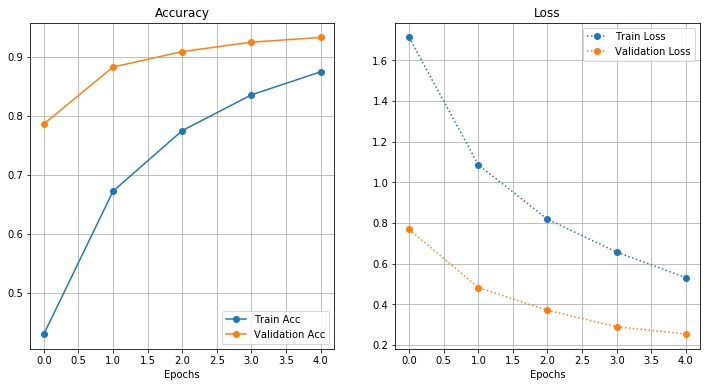

In [8]:
import matplotlib.pylab as plt
f=plt.figure(figsize=[12,6])
plt.subplot(1,2,1)
plt.plot(history.epoch, history.history['acc'],'-o', label='Train Acc')
plt.plot(history.epoch, history.history['val_acc'],'-o',label='Validation Acc')  
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.grid()
plt.legend(loc='best')
plt.subplot(1,2,2)
plt.plot(history.epoch, history.history['loss'],':o', label='Train Loss')
plt.plot(history.epoch, history.history['val_loss'],':o',label='Validation Loss')  
plt.title("Loss")
plt.xlabel("Epochs")
plt.grid()
plt.legend(loc='best')
f.savefig('scratch_resnet50.png')

In [10]:
from google.colab import files

files.download('scratch_resnet50.csv')
files.download('scratch_resnet50.png')
files.download('scratch_resnet50.h5')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 36490, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 320, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 351, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 364, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 724, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil